# Regression Model

In [1]:
import numpy as np
import pandas as pd
import env 
from env import host, user, password

import seaborn as sns
import matplotlib.pyplot as plt

What are we aming to do with **Wrangle**?
* Where is our data coming From
* How do we get it ( AKA how can we make it obtainable for others?)

### Prepare
* What does this data look like?
* Does the data look like its "suppose to"
     * Do number look like numbers, do we see any major errors in the data that could be chalked up to clerical error or otherwise corrupted information?
     * Nulls, Nans, whitspace, other problems
* If we have problems with our data, how do we deal with it?
     * Fix the problems, record how you fixed the problems(Documentation!!!)
     * Examine univariate distributions (Understand wht exploration is goint to look like going foward ex. How Normal does this data look on first blush? 'Normal' In the distributin sense, and assert how that will impact both our statistical testing, exploration and use of these variables)
     * Script it out into something that can be repeated

In [17]:
# pd.read_sql? (to see documentaion)

# steps:
I have identified what data I need and where it lives, so lets go ahead and replicate that here with python.

In [ ]:
### Another way to wrangle data
def wrangle_grades():
    '''
    Read student_grades csv file into a pandas DataFrame,
    drop student_id column, replace whitespaces with NaN values,
    drop any rows with Null values, convert all columns to int64,
    return cleaned student grades DataFrame.
    '''
    # Acquire data from csv file.
    file = "https://gist.githubusercontent.com/ryanorsinger/14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"

    grades = pd.read_csv(file)

    # Replace white space values with NaN values.
    grades = grades.replace(r'^\s*$', np.nan, regex=True)

    # Drop all rows with NaN values.
    df = grades.dropna()

    # Convert all columns to int64 data types.
    df = df.astype('int')

    return df

In [66]:
endpoint = '/school_sample'
url = f'mysql+pymysql://{user}:{password}@{host}'
url = url + endpoint
query = 'SELECT * FROM student_grades'
# we can use pd.read_sql
pd.read_sql(query, url)

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97
...,...,...,...,...,...
99,101,62.0,70,79,70
100,102,58.0,65,70,68
101,103,57.0,65,75,65
102,104,70.0,75,78,72


In [20]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [21]:
 sql_query = """
                SELECT * FROM student_grades
                """

df = pd.read_sql(sql_query, get_connection('school_sample'))

### What do we want to know about this data?
    * df.info(), gives us basic information about the features
    * df.describe(), basic descriptive statistics
    * df.size, df.shape
    * df.isnull, figure out where the missing data is located

In [22]:
df.size, df.shape

(520, (104, 5))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


Takeaways from .infor()
WE have a missing value in exam1 as shown with the non-null count
WE have noticed a blank vale in the table when we executed our sql query, how do we take care of this
Furthermore, how do we find the non-null blank values
** Exam3 is an object type and not interperted as a number in pandas.

In [24]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


Looks like Exam 1 had the widest range out of what we have presently available, averge grades are passing accorss the board

Lets look into the real nulls and the fake nulls and determine how and what to do with them

In [25]:
df.isnull().sum()

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

### How we interact with null values:
    * Do we have enough domain knowledge to assert or impute value?
    * IF we do , then this is likely the best choice, due to the corraboration of extraneous knowledge to the application of the specific dataset that we are examining
    * what is the risk of removinf it entirely?
    * If the data represents a small portion of our info, then we have a fairly low risk of dropping that information entirely
    * (Imputation is more if we have domain knowledge, since these are grades/risk assesment its best to not assume the average)
    * We have to make judgement calls as the data practitione

In [26]:
# cast whitespace as an integer does not play nice
# Noo: int(' ')

In [29]:
#df.exam3.astype(int)

### regex mini lesson for very smols
^ : 'starts with'

\s : 'any type of whitespace'

Zero or more times' : *

$ : 'ends with'

'^\s*$' : something that starts with any whitespace character or zero or more times until the end



In [30]:
# lets change the whitespace into a null value,
# since that effectively what it is
# Note its not the only option
df.exam3.replace(r'^\s*$', np.NAN,regex =True)

0      95
1      96
2      87
3      86
4      96
       ..
99     79
100    70
101    75
102    78
103    79
Name: exam3, Length: 104, dtype: object

In [31]:
# we can reassign exam3 or: pass a .replace
df = df.replace(r'^\s*$', np.NAN,regex =True)

In [32]:
df = df.dropna()

In [33]:
# recheck df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 102
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    object 
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [34]:
# did truncation change the number, any isntance where exam 1 is not an int
(df.exam1.astype(int) != df.exam1).sum()
# nope

0

In [36]:
df.describe()

,student_id,exam1,exam2,final_grade
count,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,81.970588
std,29.886909,14.167375,10.297313,10.833991
min,1.000000,57.000000,65.000000,65.000000
25%,28.250000,70.000000,70.000000,72.000000
50%,53.500000,79.000000,75.000000,81.000000
75%,78.750000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [44]:
# create a wrangle function
def wrangle_grades():
    ''' Wrangle Grades will read in a data set of grades from our clud database, 
        utilizing the get_connection function located in the env.py file
        
        The acquired data will then be passed into basic data frame and return 
        the function will be a single panda data frame'''
   
    # squl query for acquisition
    sql_query = """
                SELECT * FROM student_grades
                """
    # Acquisition
    df = pd.read_sql(sql_query, get_connection('school_sample'))
    
    # Preparation
    #replace any whitespace with null values
    df = df.replace(r'^\s*$', np.NAN,regex =True)
    # drop out any null values:
    df = df.dropna()
    # cast everything as an integer:
    df = df.astype(int)
    # remove student id, which is a arbritrasy
    df = df.drop(columns = {'student_id'})
    
    return df
    

In [47]:
clean_df = wrangle_grades()

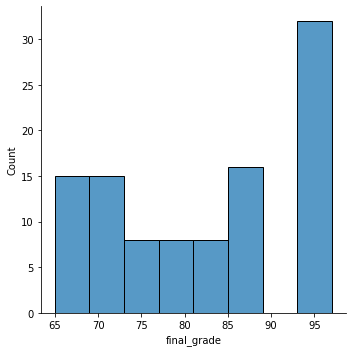

In [49]:
# lets check out some distributions before we move on explorations.
sns.displot(x='final_grade', data = clean_df)

takeaway: out target variable isnt exceptional Normal , so we will keep that in our pocket for late.
In the event that we want to utilize an algorithms for that is  contigent on Normal Data

In [50]:
# for my other columns:
columns = list(clean_df.columns)

In [51]:
clean_df.columns

Index(['exam1', 'exam2', 'exam3', 'final_grade'], dtype='object')

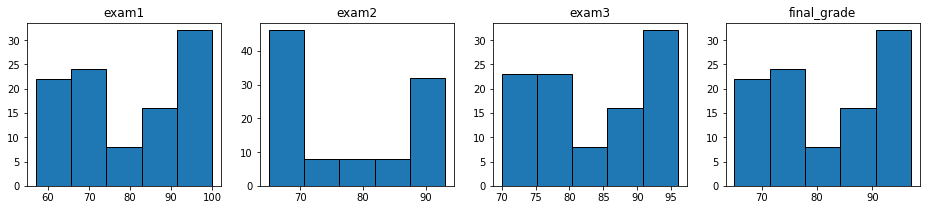

In [61]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(clean_df):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1
    
    # Create subplot.
    # plt.subplot(row X col, where?)
    plt.subplot(1,4,plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    clean_df[col].hist(bins=5, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)

takeaways:
alll our grade distributions apper to be roughly bimodal:
That is to day that the students fall into one of two different pools of student that may represent different populations

Question going foward:
Can we capture grades predictably utilizing these features?
Does the bimodal distribution of these features and the target impact our capacity to use one model
Does that even matter if the distribution of the .... are just as bimodal as the target?

### Main Stages in Exploration

* Hypothesize
    
* Visualize
        * Plot out the distributions of each feature Why?
        * Plot out the interaction of two or more variables? Why?
        * Plot out how subgroups compare to each-other and to the overall population? Why?
        * Document takeaways Why?
        * Identify features that correlate with each other Why?
* Test Hypotheses

# Wrangle$ $Exercise$ $Review$

In [2]:
# squl query for acquisition
sql_query =  """
            SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
            FROM properties_2017
            Where propertylandusetypeid = 261;
        """
    # Acquisition
df = pd.read_sql(sql_query, env.get_connection('zillow'))

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
df.to_csv('zillow')

In [ ]:
def get_zillow_data():
        ''' Acquire Zillow data using properties_2017 table from Code up Data Base. Columns bedroomcnt, 
            bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips 
        '''
   
    # sql query for acquisition
    sql_query = """
                SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
                FROM properties_2017
                Where propertylandusetypeid = 261;
                """
    # Acquisition
    df = pd.read_sql(sql_query, env.get_connection('zillow'))

In [6]:
def wrangle_single_family_residential():
    '''Wrangle_single_family_residential checks to see if the csv or zillow data exits. If it does not
        it will call for the data and save a csv file. It will return a dataframe that had drop all nulls.
    '''
    # obtain csv file
    if os.path.isfile('zillow.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = get_zillow_data()
        
        # Cache data
        df.to_csv('zillow.csv')
    # replace blank spaces and special characters
    df = df.replace(r'^\s*$', np.nan, regex = True)
    
    df = df.dropna()
    return df